# Week 9 Solutions





## Activity 1

In [1]:
!wget https://raw.githubusercontent.com/stmball/PracticalPython/main/Numpy%2C%20Pandas%20and%20Scipy/iris.csv

--2022-03-29 16:25:40--  https://raw.githubusercontent.com/stmball/PracticalPython/main/Numpy%2C%20Pandas%20and%20Scipy/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4351 (4.2K) [text/plain]
Saving to: ‘iris.csv.2’

iris.csv.2          100%[===================>]   4.25K  --.-KB/s    in 0s      

2022-03-29 16:25:40 (57.9 MB/s) - ‘iris.csv.2’ saved [4351/4351]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Parse
iris = pd.read_csv("./iris.csv", index_col=0)

iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# Preprocess
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

data = iris.drop(["Species"], axis=1).to_numpy()

# Reshape for very annoying scikitlearn problem
labels = iris["Species"].to_numpy().reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

# IMO this is better scientific method. If the test set is sight unseen then
# that should include the scaler!
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train).reshape(-1, 1, 4)
x_test = scaler.transform(x_test).reshape(-1, 1, 4)

# Although the opposite is true for labels - we need this to be the same to get
# a sensible result! sklearn makes it work:
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train).toarray().reshape(-1, 1, 3)


In [5]:
# Sanity check!
print(x_train.shape)
print(y_train[:10,:])
print(encoder.categories_)

(120, 1, 4)
[[[0. 0. 1.]]

 [[0. 1. 0.]]

 [[0. 1. 0.]]

 [[1. 0. 0.]]

 [[0. 0. 1.]]

 [[0. 0. 1.]]

 [[1. 0. 0.]]

 [[1. 0. 0.]]

 [[1. 0. 0.]]

 [[1. 0. 0.]]]
[array(['setosa', 'versicolor', 'virginica'], dtype=object)]


In [6]:
# (Perform) Training
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

model = keras.Sequential(
    [
        Dense(64, activation='relu', input_shape=(1, 4)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(3, activation='softmax')
    ]
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 64)             320       
                                                                 
 dense_1 (Dense)             (None, 1, 32)             2080      
                                                                 
 dense_2 (Dense)             (None, 1, 16)             528       
                                                                 
 dense_3 (Dense)             (None, 1, 3)              51        
                                                                 
Total params: 2,979
Trainable params: 2,979
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=25, 
                    verbose=0, 
                    batch_size=5, 
                    validation_split=0.2)

In [8]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.003446,0.427083,0.914581,0.625000
1,0.752869,0.718750,0.731210,0.625000
2,0.577226,0.802083,0.611110,0.666667
3,0.473165,0.812500,0.530688,0.708333
4,0.386416,0.833333,0.450922,0.750000
5,0.324715,0.875000,0.383295,0.833333
6,0.286488,0.895833,0.339617,0.875000
7,0.254941,0.864583,0.291430,0.875000
8,0.225204,0.937500,0.251290,0.916667
9,0.203670,0.916667,0.221579,0.916667


In [9]:
# Predict
y_predict = model.predict(x_test).reshape(-1, 3)

# Postprocess
y_predict = encoder.inverse_transform(y_predict)

from sklearn.metrics import f1_score

print("F1 Score:", f1_score(y_test, y_predict, average='macro'))

F1 Score: 0.9231746031746031


Wahey!

## Activity 2

Pretty much copied from the session.

In [10]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

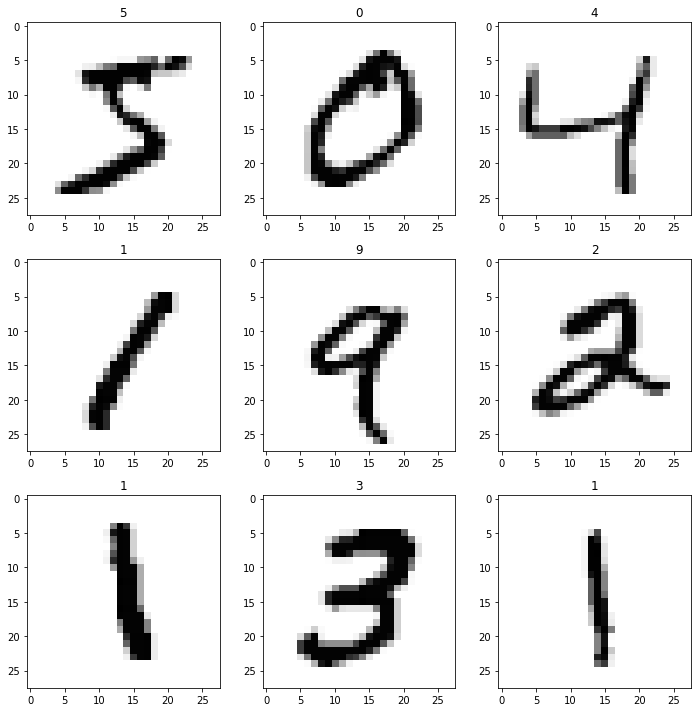

In [11]:
# Plot some images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for idx, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[idx], cmap='Greys')
    ax.set_title(y_train[idx])

plt.tight_layout()
plt.show()

In [12]:
from tensorflow.keras.utils import to_categorical

# One hot encode y_train, y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reshape so 1 image is one sample
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape)
print(x_test.shape)

# Finally scale to (0, 1)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

model = keras.Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
	    Dense(100, activation='relu'),
	    Dense(10, activation='softmax')
    ]
)

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [14]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=5, 
                    batch_size=100,
                    verbose=1, 
                    validation_split=0.2)

Epoch 1/5
480/480 [==============================] - 66s 134ms/step - loss: 0.2307 - accuracy: 0.9306 - val_loss: 0.0780 - val_accuracy: 0.9759
Epoch 2/5
480/480 [==============================] - 58s 121ms/step - loss: 0.0633 - accuracy: 0.9807 - val_loss: 0.0600 - val_accuracy: 0.9835
Epoch 3/5
480/480 [==============================] - 51s 106ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0494 - val_accuracy: 0.9873
Epoch 4/5
480/480 [==============================] - 54s 112ms/step - loss: 0.0339 - accuracy: 0.9889 - val_loss: 0.0495 - val_accuracy: 0.9846
Epoch 5/5
480/480 [==============================] - 40s 83ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0459 - val_accuracy: 0.9871


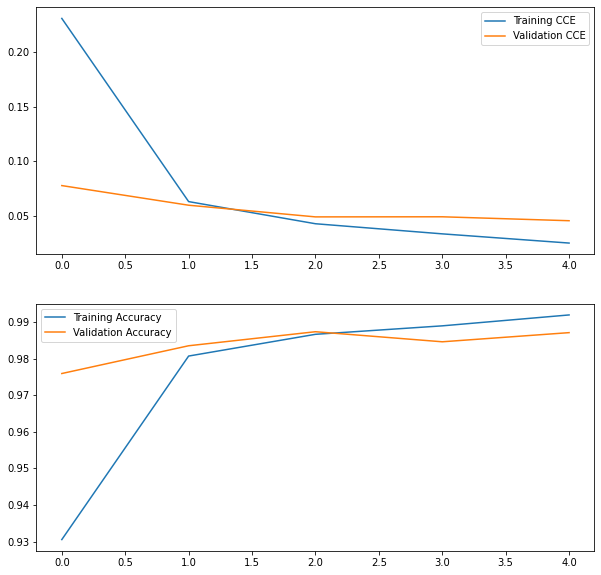

In [15]:
history_df = pd.DataFrame(history.history)
history_dffig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.plot(history_df['loss'], label="Training CCE")
ax1.plot(history_df['val_loss'], label='Validation CCE')
ax1.legend()

ax2.plot(history_df['accuracy'], label="Training Accuracy")
ax2.plot(history_df['val_accuracy'], label="Validation Accuracy")
ax2.legend()

plt.show()

In [16]:
y_predict = model.predict(x_test)

# Argmax along the rows
y_predict = np.argmax(y_predict, axis=1)
y_test = np.argmax(y_test, axis=1)

# Here we use mean absolute error to get an intepretable value.
print("F1 Score:", f1_score(y_predict, y_test, average='macro'))

F1 Score: 0.9878705327206241


Woo!

## Activity 3

In [18]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

--2022-03-29 16:30:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124103 (121K) [application/x-httpd-php]
Saving to: ‘wdbc.data’

wdbc.data           100%[===================>] 121.19K   307KB/s    in 0.4s    

2022-03-29 16:30:36 (307 KB/s) - ‘wdbc.data’ saved [124103/124103]



In [19]:
# Read data
wdbc = pd.read_csv("./wdbc.data", header=None)
wdbc.rename(columns={0: "id", 1: "label"}, inplace=True)

wdbc.head()

,id,label,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
data = wdbc.drop(["id", "label"], axis=1).to_numpy()

labels = wdbc["label"].to_numpy().reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train).reshape(-1, 1, 30)
x_test = scaler.transform(x_test).reshape(-1, 1, 30)

encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train).toarray().reshape(-1, 1, 2)

In [21]:
print(x_train.shape)
print(y_train[:10,:])
print(encoder.categories_)

(455, 1, 30)
[[[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[0. 1.]]

 [[1. 0.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[1. 0.]]

 [[1. 0.]]]
[array(['B', 'M'], dtype=object)]


In [22]:
# (Perform) Training
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

model = keras.Sequential(
    [
        Dense(64, activation='relu', input_shape=(1, 30)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(2, activation='softmax')
    ]
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1, 64)             1984      
                                                                 
 dense_7 (Dense)             (None, 1, 32)             2080      
                                                                 
 dense_8 (Dense)             (None, 1, 16)             528       
                                                                 
 dense_9 (Dense)             (None, 1, 2)              34        
                                                                 
Total params: 4,626
Trainable params: 4,626
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=25, 
                    verbose=0, 
                    batch_size=5, 
                    validation_split=0.2)

In [24]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.253005,0.912088,0.191948,0.923077
1,0.077112,0.978022,0.122867,0.978022
2,0.042389,0.986264,0.113568,0.978022
3,0.027633,0.991758,0.101665,0.978022
4,0.017484,1.000000,0.106166,0.978022
5,0.014390,0.997253,0.103060,0.978022
6,0.008936,1.000000,0.109817,0.978022
7,0.006218,1.000000,0.111734,0.978022
8,0.004910,1.000000,0.112966,0.978022
9,0.003596,1.000000,0.118181,0.978022


In [26]:
# Predict
y_predict = model.predict(x_test).reshape(-1, 2)

# Postprocess
y_predict = encoder.inverse_transform(y_predict)

from sklearn.metrics import f1_score

print("F1 Score:", f1_score(y_test, y_predict, average='macro'))

F1 Score: 0.9439895185063871


😎